# Projet : Classification du rythme cardiaque de l'ECG


Ce jeu de données est composé d'une collections de signaux de battements cardiaques provenant d'un jeu de données célèbres dans le domaine de la classification des battements cardiaques, le jeu de données sur l'arythmie du MIT-BIH. Le nombre d'échantillons dans cette collection est suffisamment important pour entraîner éventuellement un réseau de neurones profond.

Les signaux correspondent à des formes d'électrocardiogramme (ECG) de battements cardiaques pour le cas normal et les cas affectés par différentes arythmies et infarctus du myocarde. Ces signaux sont prétraités et segmentés, chaque segment correspondant à un battement cardiaque.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
train_df = pd.read_csv("./mitbih_train.csv", header = None)
test_df = pd.read_csv("./mitbih_test.csv", header = None)

print(train_df.shape)
print(test_df.shape)

train_df.head()

(87554, 188)
(21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [4]:
# Nombres de données manquantes
null_filter = train_df.isnull().sum()
missing_values = null_filter.loc[train_df.isnull().sum() != 0].to_frame().copy()
missing_values

,0


## Données brutes

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


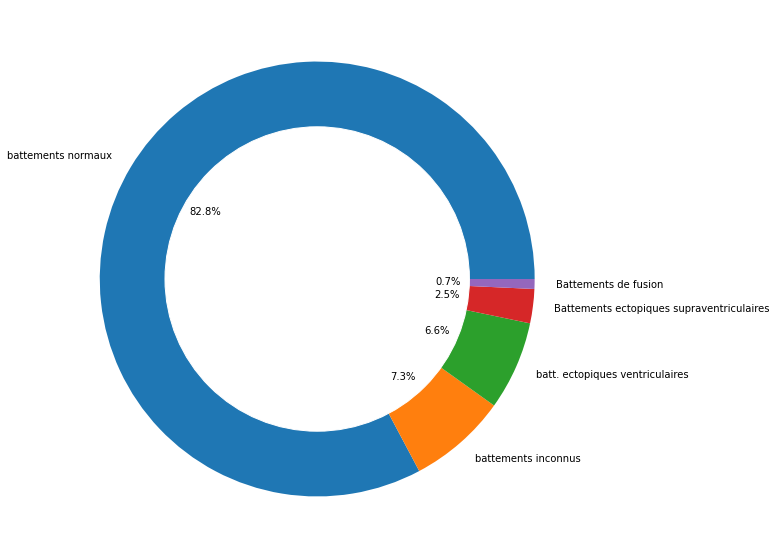

In [5]:
# representation des classes
per_class = train_df[187].value_counts()

print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Equilibrage des classes

In [6]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

NbSamples=20000

df_1_upsample=resample(df_1,replace=True,n_samples=NbSamples,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=NbSamples,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=NbSamples,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=NbSamples,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

print(train_df.shape)

(100000, 188)


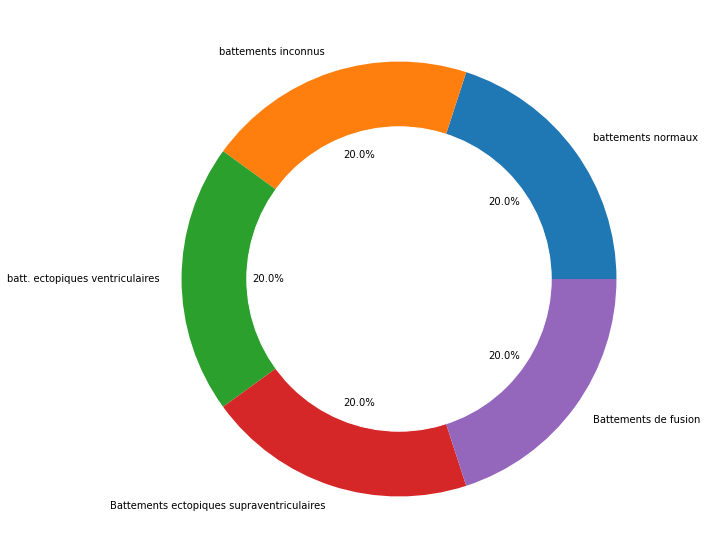

In [7]:
# Représentation des classes
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Représentation des données 

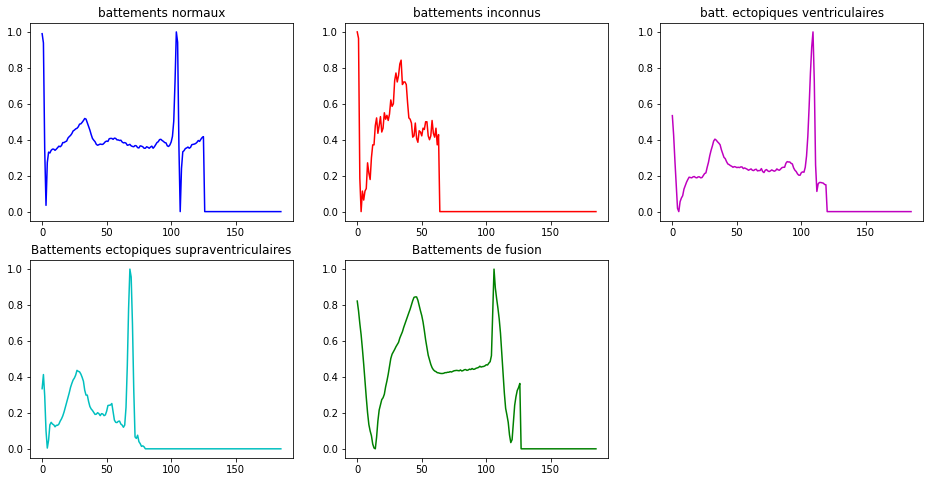

In [8]:
# représentation d'un signal pour chaque classe de battement
plt.figure(figsize=(16,8))
color=['b','r','m','c','g']
classe=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion']



for class_number in range(5):
    img=train_df.loc[train_df[187]==class_number].values
    
    plt.subplot(2, 3, class_number+1)
    plt.plot(img[1,:186],color[class_number])
    plt.title(classe[class_number])
    


## Jeu de données pour débuter

In [9]:
# Conversion en matrices
DataFull=np.asarray(train_df)
DataFullApp=DataFull[:,:187]
LabelFullApp=DataFull[:,187]
DataFullT=np.asarray(test_df)
DataFullTest=DataFullT[:,:187]
LabelFullTest=DataFullT[:,187]

# Premiers tests sur petite base d'apprentissage et 3 classes
N_CLASSES=3
TAILLE_TEST=10
TAILLE_APP=20

# 20 profils pour les 3 premières natures de battement cardiaque 
# 10 exemplaires de base de test 
DataApp=np.zeros((TAILLE_APP*N_CLASSES,187))

LabelApp=np.concatenate((np.zeros((TAILLE_APP,1)),np.ones((TAILLE_APP,1)),2*np.ones((TAILLE_APP,1))), axis=None)
print(0)

for i in range(N_CLASSES):
    DataApp[TAILLE_APP*i:TAILLE_APP*(i+1),:]=DataFullApp[NbSamples*i:NbSamples*i+TAILLE_APP,:]

DataTest=np.zeros((TAILLE_TEST*N_CLASSES,187))
LabelTest=np.concatenate((np.zeros((TAILLE_TEST,1)),np.ones((TAILLE_TEST,1)),2*np.ones((TAILLE_TEST,1))), axis=None)
for i in range(N_CLASSES):
    list_ind=np.where(LabelFullTest==i)
    DataTest[TAILLE_TEST*i:TAILLE_TEST*(i+1),:]=DataFullTest[list_ind[0][:10],:]

print(DataApp.shape)
print(DataTest.shape)

0
(60, 187)
(30, 187)


# Partie I : Implémentation de l'algorithme de programmation dynamique (DTW)

1. Ecrivez une fonction en python DTW qui implémente le calcul et l'affichage de la matrice des coûts définie en TD. 



In [10]:
from math import *
import numpy as np
import sys

def DTW():
    # à coder
    return 0

## Partie II : système de reconnaissance de battements cardiaques par DTW



**Système de reconnaissance :**
Pour chaque profil temporel test :

a) Calculer pour chaque classe, le score de la DTW entre le profil temporel test et les profils temporels de la classe 

b) Déterminer la classe d'appartenance par minimum du score sur toutes les classes


In [11]:
# Système de reconnaissance à partir de la DTW
PartitionDTW=np.zeros((TAILLE_TEST*N_CLASSES,2))

## à coder

**Evaluation :** A partir de la partition de l'ensemble test obtenue après la DTW, calculer la matrice de confusion qui recense le nombre de données bien classés et mal classés.

Matrice de confusion par DTW
Accuracy sur base de test : 1.0


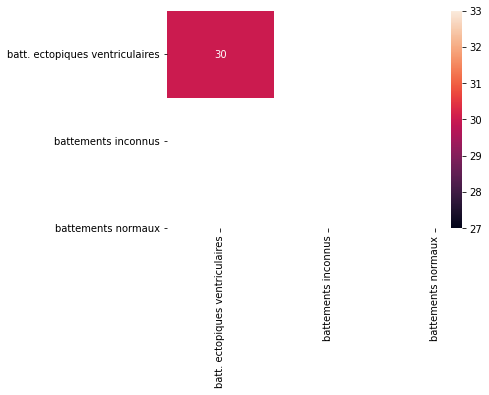

In [12]:
# Evaluation des résultats par matrices de confusion 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Matrice de confusion par DTW')
cm=confusion_matrix(PartitionDTW[:,0],PartitionDTW[:,1])
sns.heatmap(data=cm,fmt='.0f',xticklabels=np.unique(classe[:N_CLASSES]),yticklabels=np.unique(classe[:N_CLASSES]),annot=True)

# score de performance
print('Accuracy sur base de test :',accuracy_score(PartitionDTW[:,0],PartitionDTW[:,1]))

## Partie III : comparaison de la programmation dynamique avec une méthode de classification après réduction de dimension par ACP

Dans cette partie, nous allons comparer les résultats de la DTW avec ceux d'une méthode de classification de données : les k-plus proches voisins.

Nous utiliserons les fonctions permettant de calculer l'ACP et les kppv via la librairie python *scikit-learn*.


In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

### Prétraitement par ACP

Pour tester une autre méthode de classification, 

1. A partir des données Data_App de la base d'apprentissage et en utilisant la fonction *PCA* de la librairie *scikit-learn*, calculez les 3 axes principaux de l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$.Ces vecteurs propres constitueront la nouvelle base de données.

2. Projetez les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque
vecteur par la base $P = [X_1X_2X_3]$.

*Remarque :* vous pouvez aussi implémenter l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau repère P.  Projetez ensuite les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.



### Classification par k plus proches voisins

En intelligence artificielle, la méthode des k plus proches voisins (k-ppv) est une méthode d'apprentissage
supervisé. Dans ce cadre, on dispose d'une base de données d'apprentissage constituée de couples  "donnée-label". Pour estimer la sortie associée à une nouvelle entrée x, la méthode des k plus proches voisins consiste à prendre
en compte (de façon identique) les k échantillons d'apprentissage dont l'entrée est la plus proche de la nouvelle
entrée x, selon une distance à définir. 


1. En utilisant la fonction *KNeighborsClassifier* de la librairie *sklearn.neighbors*, réalisez une classification par k-ppv sur la base d'apprentissage et la base de test que vous avez prédéfinies (prendre $k=1$).

2. Evaluez la méthode des k-ppv par le calcul de la matrice de confusion et du taux de reconnaissance.

3. Modifiez la valeur de $k$ pour les k-ppv. Améliorez-vous les scores de reconnaissance ?

4. Comparez vos résultats avec ceux de la DTW.





In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

## Partie IV : Comparaison avec d'autres méthodes d'apprentissages supervisés


### Classification par Forêts aléatoires

Les forêts aléatoires font partie des techniques d'apprentissage automatique. Cet algorithme combine les concepts de sous-espaces aléatoires et de bagging. L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.

In [15]:
from sklearn.ensemble import RandomForestClassifier 

### Classification par réseaux de neurones

1. Réaliser une classification via les réseaux de neurones
2. Evaluer les résultats par matrice de confusion par exemple, fonction de perte...
3. Tester différentes architectures et différentes solveurs

In [16]:
from sklearn.neural_network import MLPClassifier

# Partie V : votre étude

Réalisez votre propre étude en :
- en augmentant les bases de test et/ou d'apprentissage, en faisant du prétraitements sur les données
- en proposant des variantes des méthodes proposées ou en utilisant d'autres méthodes
- en rajoutant davantage de classes (jusqu'à 2 supplémentaires : 4-Battements ectopiques supraventriculaires, 5-Battements de fusion)
le tout en testant les différentes approches et en interprétant les résultats, à synthétiser sur un rapport. 